In [1]:
from matplotlib import pyplot as plt
import random
import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/uweschmitt/Projects/python3-advanced-challenges/venv3.6/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
def min_position(li, start_at):
    assert len(li) > 0
    assert start_at < len(li)
    
    min_value = li[start_at]
    min_position = start_at
    
    for i, value in enumerate(li[start_at + 1:]):
    
        if value < min_value:
            min_value = value
            min_position = start_at + 1 + i
    
    return min_position

In [4]:
li = [1, 2, 3, 1, 2]
assert min_position(li, 0) == 0
assert min_position(li, 1) == 3
assert min_position(li, 2) == 3
assert min_position(li, 3) == 3
assert min_position(li, 4) == 4

In [5]:
def step(i, li):
    idx = min_position(li, i)
    li[i], li[idx] = li[idx], li[i]  # tuple unpacking

    
def selection_sort(li, debug=False):
    # copy li first so that li is not sorted inplace
    # but the function returns a new list with sorted
    # values:
    li = li[:]
    
    if debug:
        print("  ", li)
    
    for i in range(len(li) - 1):
        step(i, li)
        if debug:
            print("{:2d} {}".format(i, li))
       
    return li

In [6]:
import random

data = list(range(10))
selection_sort(data, True)

print()

random.shuffle(data)
selection_sort(data, True)

for i in range(100000):
    random.shuffle(data)
    assert sorted(data) == selection_sort(data), data

   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 1 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 2 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 3 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 4 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 5 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 6 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 7 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
 8 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

   [9, 2, 3, 6, 1, 5, 8, 0, 7, 4]
 0 [0, 2, 3, 6, 1, 5, 8, 9, 7, 4]
 1 [0, 1, 3, 6, 2, 5, 8, 9, 7, 4]
 2 [0, 1, 2, 6, 3, 5, 8, 9, 7, 4]
 3 [0, 1, 2, 3, 6, 5, 8, 9, 7, 4]
 4 [0, 1, 2, 3, 4, 5, 8, 9, 7, 6]
 5 [0, 1, 2, 3, 4, 5, 8, 9, 7, 6]
 6 [0, 1, 2, 3, 4, 5, 6, 9, 7, 8]
 7 [0, 1, 2, 3, 4, 5, 6, 7, 9, 8]
 8 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
import time
from statistics import median

def measure(n):
    data = list(range(n))
    times = []
    for _ in range(5):
        random.shuffle(data)
        started = time.time()
        selection_sort(data)
        times.append(time.time() - started)
    return median(times)

In [8]:
times = []
sizes = np.array((100, 300, 500, 750, 1000, 1500, 2000, 2500, 3000))

for size in sizes:
    print(size)
    times.append(measure(size))

100
300
500
750
1000
1500
2000
2500
3000


### Runtime analysis

`step(i)` scans `n - i` elements which needs time `a (n - i)`. the swap has constant time `c`. This adds up to:

 $ a n + a (n - 1) + a (n - 2) + ... + a + n c = a \frac{(n + 1) n}{2} + n c = \frac{a}{2} n^2 + (\frac{a}{2} + c) n $

Thus the runtime is dominated by $n^2$:

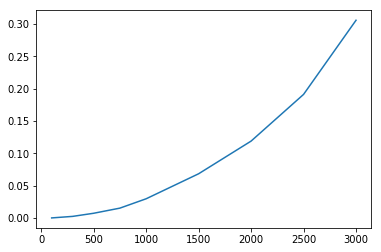

In [9]:
plt.plot(sizes, times)
plt.show()

In [10]:
#REMOVEBEGIN
# THE LINES BELOW ARE JUST FOR FORMATTING THE INSTRUCTIONS ABOVE !
from IPython import utils, paths
from IPython.core.display import HTML
import os
def css_styling():
    """Load default custom.css file from ipython profile"""
    # base = utils.path.get_ipython_dir()
    base = paths.get_ipython_dir()
    styles = """<style>
    
    @import url('http://fonts.googleapis.com/css?family=Source+Code+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Kameron');
    @import url('http://fonts.googleapis.com/css?family=Crimson+Text');
    
    @import url('http://fonts.googleapis.com/css?family=Lato');
    @import url('http://fonts.googleapis.com/css?family=Source+Sans+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Lora'); 

    
    body {
        font-family: 'Lora', Consolas, sans-serif;
      
    }
    .rendered_html code
    {
        color: black;
        background: #eaf0ff;
        padding: 1pt;
        font-family:  'Source Code Pro', Consolas, monocco, monospace;
    }
    
    .CodeMirror pre {
    font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
    }
    
    .cm-s-ipython span.cm-keyword {
        font-weight: normal;
     }
     
     strong {
         background: #ffe7e7;
         padding: 1pt;
     }
     
    
    div #notebook {
        # font-size: 10pt; 
        line-height: 145%;
        }
        
    li {
        line-heigt: 145%;
    }

    div.output_area pre {
        background: #fffdf0;
        padding: 3pt;
    }
    h1, h2, h3, h4 {
        font-family: Kameron, arial;
    }
    
    div#maintoolbar {display: none !important;}
    </style>"""
    return HTML(styles)
css_styling()
#REMOVEEND